In [82]:
import copy

import matplotlib.pyplot as plt
import numpy as np
import pyaudio
from scipy.io.wavfile import read, write
import wave

In [67]:
INT16_FAC = 2**15 - 1
INT32_FAC = 2**31 - 1
INT64_FAC = 2**63 - 1
norm_fact = {'int16': INT16_FAC,
             'int32': INT32_FAC,
             'int64': INT64_FAC,
             'float32': 1.0,
             'float64': 1.0}

In [46]:
CHUNK = 1024 # n samples per chunk
FORMAT = pyaudio.paInt16 # 16 bits per sample
CHANNELS = 1
FS = 44100 # samples per sec
AUDIO = './audio'

In [59]:
def record(seconds=3):
    p = pyaudio.PyAudio()
    print('Recording...')
    stream = p.open(format=FORMAT, 
                    channels=CHANNELS,
                    rate=FS, 
                    frames_per_buffer=CHUNK, 
                    input=True)
    frames = []
    for i in range(int(FS / CHUNK * seconds)):
        data = stream.read(CHUNK)
        frames.append(data)

    stream.stop_stream()
    stream.close()
    p.terminate()
    print('Done.')
    return p, frames

In [60]:
def save_recording(p, frames, filename):
    wf = wave.open(f'{AUDIO}/{filename}', 'wb')
    wf.setnchannels(CHANNELS)
    wf.setsampwidth(p.get_sample_size(sample_format))
    wf.setframerate(fs)
    wf.writeframes(b''.join(frames))
    wf.close()
    print('Saved', filename)

In [63]:
def record_file(filename='out.wav', seconds=3):
    p, frames, = record(seconds)
    save_recording(p, frames, filename)

In [88]:
def wavread(filename):
    """
    Read a sound file and convert it to a normalized floating point array
    filename: name of file to read
    returns fs: sampling rate of file, x: floating point array
    """
    fs, x = read(filename)
    if (len(x.shape) != 1):  # raise error if more than one channel
        raise ValueError("Audio file should be mono")
    if (fs != 44100):
        raise ValueError("Sampling rate of input sound should be 44100")
    # scale down and convert audio into floating point number in range 
    # [-1, 1]
    x = np.float32(x) / norm_fact[x.dtype.name]
    return fs, x

In [89]:
def wavwrite(x, fs=FS, filename='out_rev.wav'):
    """
    Write a sound file from an array with the sound and the sampling rate
    y: floating point array of one dimension, fs: sampling rate
    filename: name of file to create
    """
    x = copy.deepcopy(x) # copy array
    # scaling floating point -1 to 1 range signal to int16 range
    x *= INT16_FAC 
    x = np.int16(x) # converting to int16 type
    write(f'{AUDIO}/{filename}', fs, x)

In [162]:
record_file()

Recording...
Done.
Saved out.wav


In [163]:
#!play audio/out.wav

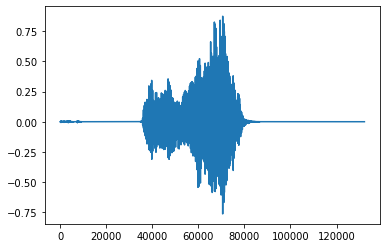

In [164]:
fs, x = wavread(f'{AUDIO}/out.wav')
plt.plot(x);

In [165]:
x_rev = x[::-1]

In [166]:
wavwrite(x_rev)

In [167]:
!play 'audio/out_rev.wav'


audio/out_rev.wav:

 File Size: 264k      Bit Rate: 706k
  Encoding: Signed PCM    
  Channels: 1 @ 16-bit   
Samplerate: 44100Hz      
Replaygain: off         
  Duration: 00:00:03.00  

In:100%  00:00:03.00 [00:00:00.00] Out:132k  [      |      ] Hd:1.1 Clip:0    
Done.
